#     Weibull Analysis 

#### Weibull analysis is a statistical method commonly used for reliability and survival analysis, particularly in the field of failure analysis.


Link : https://chat.openai.com/share/0141f389-72bf-433e-90a0-760033952ce7
Link 2 : https://quality-one.com/weibull/

# 

#### Conduct Weibull analysis on the time-to-failure data of the lithium-ion batteries to gain insights into their reliability patterns and make recommendations for quality improvement and warranty decisions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import fmin

In [3]:
# Sample data (replace this with your own dataset)
data = np.array([500, 600, 700, 800, 1000, 1200, 1300, 1400, 1500, 1600])

##### Step 2 : Parameter Estimation 

Using statistical software or specialized reliability tools, you perform Weibull analysis to estimate the parameters (λ and k) of the distribution based on the collected data.

In [6]:
def weibull_likelihood(parameters, data): #weibull_likelihood, calculates the negative log-likelihood of the Weibull distribution given the data and the parameters
    shape, scale = parameters
    return -np.sum(weibull_min.logpdf(data, shape, scale=scale))

initial_guess = [2, 1000]
estimated_parameters = fmin(weibull_likelihood, initial_guess, args=(data,), disp=False) 
# fmin function from SciPy's optimize module is used to minimize the negative log-likelihood. 

# weibull_likelihood: The objective function to be minimized.
# initial_guess: Initial estimates for the parameters.
# args=(data,): Additional arguments passed to the objective function (in this case, the time-to-failure data).
# disp=False: Suppresses the display of optimization-related messages.
    
estimated_shape, estimated_scale = estimated_parameters

##### 3. Weibull Probability Plot:
You create a Weibull probability plot to visually assess how well the data fits the Weibull distribution. The plot will show a straight line if the data follows the Weibull distribution.

In [9]:
# np.sort(data)   is used to sort the data in ascending order, 
# np.arange(1, len(data) + 1) / len(data) generates the cumulative probability values.
# This creates a scatter plot of the data points against their cumulative probabilities.

# Cummulative Probability : the probability that a random variable takes on a value less than or equal to a given value. 

#### the cumulative probability on the Weibull probability plot provides a dynamic view of the reliability of lithium-ion batteries over time.  

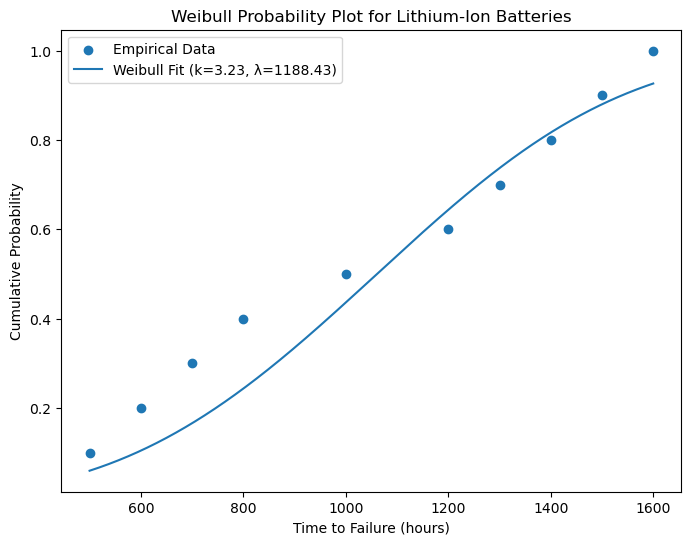

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(np.sort(data), np.arange(1, len(data) + 1) / len(data), label='Empirical Data')

x = np.linspace(min(data), max(data), 1000)

y = weibull_min.cdf(x, c=estimated_shape, scale=estimated_scale)

plt.plot(x, y, label=f'Weibull Fit (k={estimated_shape:.2f}, λ={estimated_scale:.2f})')

plt.title('Weibull Probability Plot for Lithium-Ion Batteries')
plt.xlabel('Time to Failure (hours)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

#### If the empirical data points closely follow the theoretical Weibull curve, it suggests that the Weibull distribution is a good fit for the data.
#### Deviations or patterns in the scatter plot may indicate potential issues or characteristics in the data, such as early-life failures, wear-out failures, or other failure modes.

##### 4. Reliability and Failure Rate Analysis:
With the estimated parameters, you calculate the reliability function (R(t))
R(t)) and the failure rate (λ(t)). This information provides insights into how the reliability of the light bulbs changes over time and when they are more likely to fail.

In [11]:
reliability = weibull_min.sf(data, c=estimated_shape, scale=estimated_scale)

##### 5. Decision-Making:
The Weibull analysis might reveal that the light bulbs exhibit a particular failure pattern, such as early-life failures or wear-out failures. This information can guide decisions related to product design, manufacturing processes, and warranty policies.


In [12]:
failure_rate = weibull_min.pdf(data, c=estimated_shape, scale=estimated_scale)

##### 6. Predictive Maintenance:
Based on the analysis, you can develop a predictive maintenance strategy. For instance, if the failure rate increases after a certain number of hours, you might recommend replacing bulbs before reaching that critical point to avoid unexpected failures.

In [13]:
#  Here you can analyze the reliability and failure rate patterns to make recommendations for quality improvement and warranty decisions.

##### 7. Quality Improvement:
If the Weibull analysis indicates a deviation from expected failure patterns, you can investigate the root causes. This might lead to improvements in the manufacturing process or changes in the design to enhance product reliability.

In [14]:
print("Estimated Shape Parameter (k):", estimated_shape)
print("Estimated Scale Parameter (λ):", estimated_scale)
print("Reliability at 1000 hours:", reliability[data == 1000][0])
print("Average Failure Rate:", np.mean(failure_rate))

Estimated Shape Parameter (k): 3.2276630397021684
Estimated Scale Parameter (λ): 1188.4301953062732
Reliability at 1000 hours: 0.5639388103754364
Average Failure Rate: 0.0007004930055733345


###  56.4% of batteries are expected to survive beyond 1000 hours. 

#### The estimated Weibull parameters (k and λ) suggest a distribution with a moderate shape parameter and a scale parameter indicating a characteristic life around 1188 hours.

#### The reliability at 1000 hours indicates a moderate probability of survival at that specific time.

#### The average failure rate is low, suggesting that, on average, failures occur infrequently.